In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [23]:
pd.options.mode.chained_assignment = None

# Data Wrangling


## Data gathering

Data on Cars used for Testing Fuel Economy,

The test data used to determine fuel economy estimates is derived from vehicle testing done at EPA's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers who submit their own test data to EPA.

I will analyze the data sets for 2018 and 2008, that can be found [here](https://www.fueleconomy.gov/feg/download.shtml/)

In [24]:
# reading the data
df_18 = pd.read_csv('all_alpha_18.csv')
df_08 = pd.read_csv('all_alpha_08.csv')

## Data assessing

In [25]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [26]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [27]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [28]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [29]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

---
## Data cleaning

### Drop Extraneous Columns

In [30]:

# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [31]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


---
###  Rename Columns

In [32]:
# rename Sales Area to Cert Region for consistency.
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [33]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [34]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [35]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [36]:
# save new datasets for next section
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)

---
### Filtering
For consistency, only compare cars certified by California standards

In [37]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [38]:
# drop certification region columns form both datasets
# cuz it will no longer provide any useful information (we'll know every value is 'CA').
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

---
### Drop Rows with Missing Values

In [39]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [40]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [41]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

---
### Dealing with duplicated data

In [42]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

23
3


In [43]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [44]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

0
0


In [45]:
# save progress for the next section
df_08.to_csv('data_08_v2.csv', index=False)
df_18.to_csv('data_18_v2.csv', index=False)

---
### Dealing with features Data Types

**Fixing `cyl` Data Type**

In [62]:
df_08 = pd.read_csv('data_08_v2.csv')
df_18 = pd.read_csv('data_18_v2.csv') 

In [58]:
print(df_08['cyl'].dtypes)

object


In [59]:
print(df_18['cyl'].dtypes)

float64


**So, we need to fix cyl Data Type like this**
* 2008: extract int from string
* 2018: convert float to int


[reference](https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas)

In [63]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

In [64]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

In [65]:
df_08.to_csv('data_08_v3.csv', index=False)
df_18.to_csv('data_18_v3.csv', index=False)

----


**Fixing `air_pollution_score` Data Type**

In [66]:
df_08 = pd.read_csv('data_08_v3.csv')
df_18 = pd.read_csv('data_18_v3.csv')

In [68]:
print(df_08['air_pollution_score'].dtypes)

object


In [69]:
print(df_18['air_pollution_score'].dtypes)

int64


**So, we need to fix air_pollution_score Data Type like this**
* 2008: convert string to float
* 2018: convert int to float

In [70]:
# tried using Pandas to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- but this didn't work
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

**After some investigations I found that the mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:**

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."

In [71]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [72]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
195,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
196,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
197,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
212,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
214,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [73]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle


In [74]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [75]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [76]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [77]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [78]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [79]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


**Repeating this process for the 2018 dataset**

In [80]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

In [81]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [82]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [83]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


---
**Now we can comfortably continue the changes needed for `air_pollution_score`!**

In [84]:
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [85]:
# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

In [86]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

---
**Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes**
*  2008 and 2018: convert string to float

In [87]:
df_08 = pd.read_csv('data_08_v4.csv')
df_18 = pd.read_csv('data_18_v4.csv')

In [88]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

---
**Fix `greenhouse_gas_score` datatype**
* 2008: convert from float to int

In [94]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(np.int64)

In [95]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [91]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [96]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

**All the dataypes are now fixed!**

In [97]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

---
# EDA

In [98]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

**Comparing distributions**
* for `greenhouse_gas_score`
* for combined mpg

<AxesSubplot:ylabel='Frequency'>

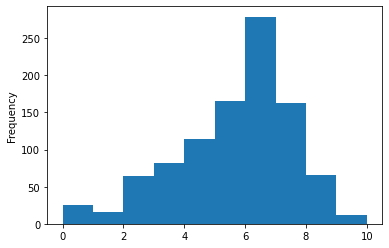

In [99]:
df_08['greenhouse_gas_score'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

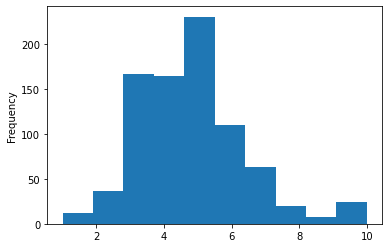

In [100]:
df_18['greenhouse_gas_score'].plot(kind='hist')

> Distribution for 2008 is more skewed to the left


<AxesSubplot:ylabel='Frequency'>

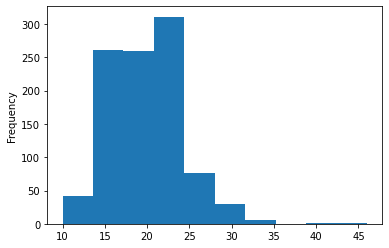

In [101]:
df_08['cmb_mpg'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

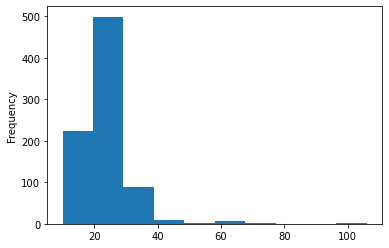

In [102]:
df_18['cmb_mpg'].plot(kind='hist')

> distribution of combined mpg changed from 2008 to 2018 and became more skewed to the right

**Checking the correlation**

<AxesSubplot:xlabel='displ', ylabel='cmb_mpg'>

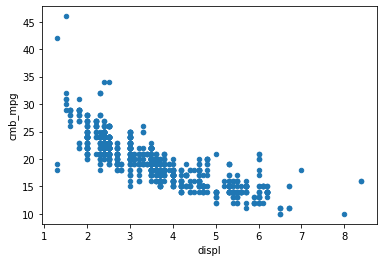

In [104]:
df_08.plot(x='displ', y='cmb_mpg', kind='scatter')

> It's a negative correlation between displacement and combined mpg

<AxesSubplot:xlabel='greenhouse_gas_score', ylabel='cmb_mpg'>

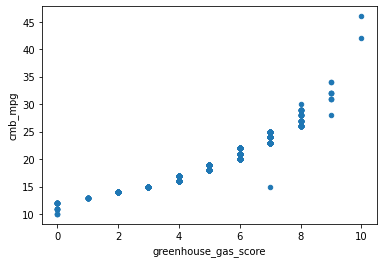

In [105]:
df_08.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter')

> It's a Positive correlation between greenhouse gas score and combined mpg

---
# drawing conclusions based on answerign some questions

##  Q1: Are more unique models using alternative sources of fuel? By how much?

Let's first look at what the sources of fuel are and which ones are alternative sources.

In [106]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [107]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. 


In [108]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [109]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

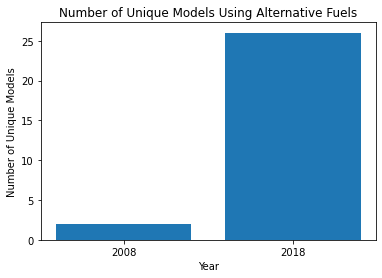

In [110]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2008, the number of unique models using alternative sources of fuel increased by 24.

---
##  Q2: How much have vehicle classes improved in fuel economy?

Let's look at the average fuel economy for each vehicle class for both years.

In [111]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [112]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [113]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

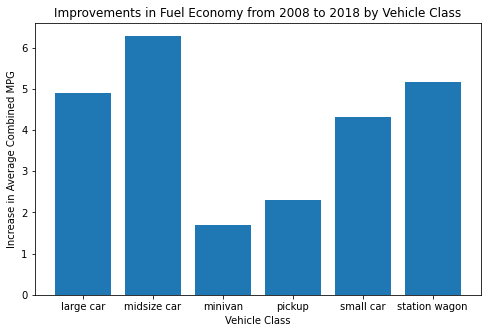

In [114]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');